In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = [[828, 920, 1234567, 1020, 1111],

            [824, 910, 2345612, 1090, 1234],

            [880, 900, 3456123, 1010, 1000],

            [870, 990, 2312123, 1001, 1122],

            [860, 980, 3223123, 1008, 1133],

            [850, 970, 2432123, 1100, 1221]]

data = np.float32(data)

In [3]:
data

array([[8.280000e+02, 9.200000e+02, 1.234567e+06, 1.020000e+03,
        1.111000e+03],
       [8.240000e+02, 9.100000e+02, 2.345612e+06, 1.090000e+03,
        1.234000e+03],
       [8.800000e+02, 9.000000e+02, 3.456123e+06, 1.010000e+03,
        1.000000e+03],
       [8.700000e+02, 9.900000e+02, 2.312123e+06, 1.001000e+03,
        1.122000e+03],
       [8.600000e+02, 9.800000e+02, 3.223123e+06, 1.008000e+03,
        1.133000e+03],
       [8.500000e+02, 9.700000e+02, 2.432123e+06, 1.100000e+03,
        1.221000e+03]], dtype=float32)

# Normalization 이전

In [6]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

In [12]:
ydata

array([[1111.],
       [1234.],
       [1000.],
       [1122.],
       [1133.],
       [1221.]], dtype=float32)

In [32]:
x = tf.placeholder(tf.float32 , shape = [None,4])
y = tf.constant(ydata , tf.float32)

w = tf.Variable(tf.random_uniform([4,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean( tf.square(hx-y))

optimizer = tf.train.GradientDescentOptimizer(0.0000000000001)
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer() #############중요!!!!!!!!!!!!!!!!!!(variable값 초기화)
sess.run(init)

In [37]:
for i in range(1000001):
    sess.run(train,{x:xdata})
    if i%100000 == 0 :
        print(i,sess.run(cost,{x:xdata}))

0 10440.566
100000 10440.566
200000 10440.566
300000 10440.566
400000 10440.566
500000 10440.566
600000 10440.566
700000 10440.566
800000 10440.566
900000 10440.566
1000000 10440.566


# Dataset 정규화
## Normalization ((MIN && MAX Normalization))
### xnew = (x-xmin) / (xmax - xmin)
## Standardization
### xnew = (x - mu)/sig

In [43]:
scale = preprocessing.MinMaxScaler() ## MIN&&MAX Normalization
dataN = scale.fit_transform(data)

In [44]:
dataN

array([[0.0714283 , 0.22222233, 0.        , 0.19191933, 0.47435904],
       [0.        , 0.11111164, 0.50012016, 0.89899063, 1.0000005 ],
       [1.        , 0.        , 1.        , 0.09090996, 0.        ],
       [0.8214283 , 1.        , 0.48504567, 0.        , 0.52136755],
       [0.6428566 , 0.8888893 , 0.8951186 , 0.07070732, 0.56837654],
       [0.4642849 , 0.7777777 , 0.5390618 , 1.        , 0.94444466]],
      dtype=float32)

In [53]:
xdata = dataN[:,:-1]
ydata = dataN[:,[-1]]

In [56]:
x = tf.placeholder(tf.float32 , shape = [None,4])
y = tf.constant(ydata , tf.float32)

w = tf.Variable(tf.random_uniform([4,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean( tf.square(hx-y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer() #############중요!!!!!!!!!!!!!!!!!!(variable값 초기화)
sess.run(init)

In [59]:
for i in range(100001):
    sess.run(train,{x:xdata})
    if i%10000 == 0 :
        print(i,sess.run(cost,{x:xdata}))

0 0.0033238307
10000 0.0033238307
20000 0.0033238307
30000 0.0033238307
40000 0.0033238307
50000 0.0033238307
60000 0.0033238307
70000 0.0033238307
80000 0.0033238307
90000 0.0033238307
100000 0.0033238307


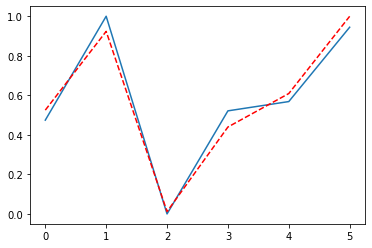

In [60]:
plt.plot(ydata)
plt.plot(sess.run(hx,{x:xdata}),'r--')
plt.show()

# 데이터 넣을떄도 전처리 과정 필요함 (prediction 뽑을때)

In [61]:
arr = scale.transform([[828,920,1234567,1020,None]])
arr[:,:-1]

array([[7.14281425e-02, 2.22222470e-01, 1.00739044e-08, 1.91919606e-01]])

In [63]:
float(sess.run(hx, {x:arr[:,:-1]}))

0.525052011013031

### 역변환 실행 및 출력값 도출과정

In [68]:
f = scale.inverse_transform([[None,None,None,None,float(sess.run(hx, {x:arr[:,:-1]}))]])

f[:,[-1]]

float(f[:,[-1]])

1122.8621113377699

# f = scale.inverse_transform의 input 형식에 None 포함 안할때 (input variable 숫자 많을때)

In [85]:
labelScale = preprocessing.MinMaxScaler()
y1 = labelScale.fit_transform(data[:,[-1]])
y1

array([[0.47435904],
       [1.0000005 ],
       [0.        ],
       [0.52136755],
       [0.56837654],
       [0.94444466]], dtype=float32)

In [86]:
labelScale

MinMaxScaler(copy=True, feature_range=(0, 1))

In [88]:
labelScale.inverse_transform([[0.52571404]])

array([[1123.01702611]])